In [1]:
# homework 7
# YOU MUST USE GL2016.TXT file FOR THIS ASSIGNMENT #
import pandas as pd
import numpy as np
pd.options.display.max_columns = 200 # let's you scroll to 200 columns
import matplotlib.pyplot as plt

In [2]:
# problem 1
# using the Batting.csv file, which players have the most homeruns (HR)
# in a season?  display the top 25.


# Read in the Batting.csv file
batting = pd.read_csv('Batting.csv')

#Group the data by player name and year and sum the homeruns column
#as_index did not come from the notes, but from the PANDAS documentation. 
#By setting to false, you retrieve "SQL style" grouped output
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html 
homeruns = batting.groupby(['playerID', 'yearID'], as_index=False)['HR'].sum()

# Sort the DataFrame by homeruns in descending order
homerunsSorted = homeruns.sort_values('HR', ascending=False)

# Select the top 25 players by homeruns
top25 = homerunsSorted.head(25)

# Display the top 25 players by homeruns
print(top25)



         playerID  yearID  HR
8598    bondsba01    2001  73
60887   mcgwima01    1998  70
88009    sosasa01    1998  66
60888   mcgwima01    1999  65
88012    sosasa01    2001  64
88010    sosasa01    1999  63
47697   judgeaa01    2022  62
57637   marisro01    1961  61
81540    ruthba01    1927  60
81534    ruthba01    1921  59
89027   stantmi03    2017  59
35516   greenha01    1938  58
43522   howarry01    2006  58
30300    foxxji01    1932  58
60886   mcgwima01    1997  58
79604   rodrial01    2002  57
34399   gonzalu01    2001  57
101021  wilsoha01    1930  56
35944   griffke02    1998  56
35943   griffke02    1997  56
79609   rodrial01    2007  54
57396   mantlmi01    1961  54
69993   ortizda01    2006  54
81541    ruthba01    1928  54
5237    bautijo02    2010  54


In [3]:
# which players have had the most hit-by-pitches (HBP) in a season?  
# display the top 10.

# Read in the Batting.csv file
battings = pd.read_csv('Batting.csv')

#group by player and year, sum HBP. as_index taken from the pandas documentation (linked in question above) 
HBP = battings.groupby(['playerID', 'yearID'],as_index=False)['HBP'].sum()

#sort the values from highest to lowest
HBPsorted = HBP.sort_values('HBP',ascending=False)

#grab only top 10
top10= HBPsorted.head(10)

#print to console
print(top10)


        playerID  yearID   HBP
45886  jennihu01    1896  51.0
44467   huntro01    1971  50.0
45887  jennihu01    1897  46.0
45888  jennihu01    1898  46.0
60532  mcganda01    1898  39.0
60533  mcganda01    1899  37.0
98783  welchcu01    1891  36.0
5297   baylodo01    1986  35.0
98782  welchcu01    1890  34.0
7330   biggicr01    1997  34.0


In [4]:
# which players have grounded into double plays (GIDP) the most
# in a season? display the top 10.

# Read in the Batting.csv file
battingss = pd.read_csv('Batting.csv')

#group by player and year, sum HBP. as_index taken from the pandas documentation (linked in question above) 
GIDP = battings.groupby(['playerID', 'yearID'],as_index=False)['GIDP'].sum()

#sort the values from highest to lowest
GIDPsorted = GIDP.sort_values('GIDP',ascending=False)

#grab only top 10
top10= GIDPsorted.head(10)

#print to console
print(top10)

        playerID  yearID  GIDP
78083   riceji01    1984  36.0
78084   riceji01    1985  35.0
12887  butlebi03    2010  32.0
92267  tejadmi01    2008  32.0
45916  jenseja01    1954  32.0
78619  ripkeca01    1985  32.0
35830  grievbe01    2000  32.0
24070  doerrbo01    1949  31.0
60623  mcgehca01    2014  31.0
2600   armasto01    1983  31.0


In [5]:
# problem 2 (crosstabs)
# using the GL2016.TXT file, make a crosstab that calculates 
# the number of games each home team has played by time of day

#load in csv file, wth or without the hader argument the output remains the same. 
#I used it because thats how it is in the notes
gamelogsDF2016 = pd.read_csv("GL2016.TXT", header = None)

#Same here, the notes had colums 1-162. Im just assuming there are 162 columns in the file 
#because anything over that number presents an error
gamelogsDF2016.columns = range(1,162)

#Create crsstabs on column 7 (team) and column 13 (time of day). Automatically aggregates
crosstab = pd.crosstab(gamelogsDF2016[7],gamelogsDF2016[13])

#Display crosstabs
crosstab

13,D,N
7,,
ANA,17,64
ARI,21,60
ATL,21,60
BAL,19,62
BOS,24,57
CHA,28,53
CHN,45,36
CIN,31,50
CLE,26,55


In [12]:
# make a crosstab that calculates the average attendance by
# home team and time of day. you'll need to use the
# "values" and "aggfunc" options as we did in class.

# Load the GL2016.TXT file into a pandas DataFrame
df = pd.read_csv('GL2016.TXT', header = None)

#Extract the home team, game time, and game attendance columns. I'm assuming game attendance is column 17 
#because its the closest result; however I really don't know.
#3 is the home team, 12 is the time of day (not sure why this is different from the crosstabs in the 
#questions before), I just trialed and errorred my way through the indicies to find the ones i wanted
newdf = df[[3, 12, 17]]

# Create a crosstab that calculates the average attendance by home team and time of day.
# Run aggregate function 'mean' on column 17 (game attendance)
crosstab = pd.crosstab(newdf[3], newdf[12], values=newdf[17], aggfunc='mean')


#print result to the output
print(crosstab)

12              D             N
3                              
ANA  26451.296296  29788.592593
ARI  35237.034483  31287.807692
ATL  29294.125000  27483.428571
BAL  32449.600000  31505.553571
BOS  37515.346154  29820.454545
CHA  31146.750000  26626.245283
CHN  37288.964286  33870.716981
CIN  33152.000000  31366.403509
CLE  30024.931034  24658.823529
COL  31003.520000  31672.785714
DET  29163.407407  27889.129630
HOU  29778.310345  27072.365385
KCA  27076.428571  28295.950000
LAN  34603.600000  32225.196429
MIA  29914.250000  27918.736842
MIL  33445.620690  29565.115385
MIN  29717.692308  26241.600000
NYA  33211.523810  30145.900000
NYN  28293.625000  31303.508772
OAK  30703.782609  29039.000000
PHI  33039.000000  29525.903846
PIT  34758.692308  27761.090909
SDN  33668.233333  32364.941176
SEA  30585.500000  26970.039216
SFN  31068.481481  32712.092593
SLN  31739.625000  30274.543860
TBA  32864.071429  28625.471698
TEX  30095.555556  26293.555556
TOR  32645.633333  28547.529412
WAS  331

<module 'matplotlib.pyplot' from '/Users/ZeZe/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


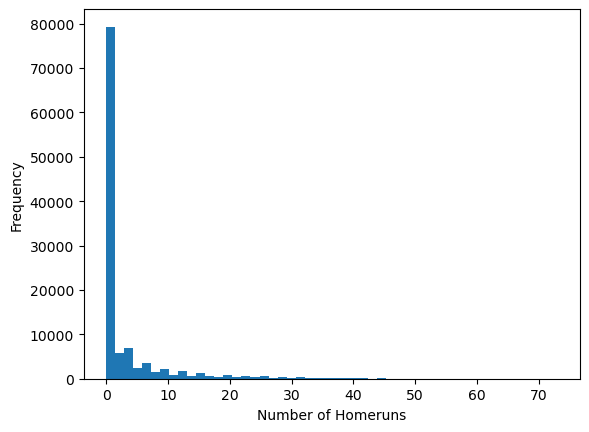

In [7]:
# problem 3 (plots)
# using the Batting.csv file, create a histogram of homeruns
# use bins=50

#.hist function creates a histogram from the HR column within the Batting csv file
#bins sets the distribution of the plot to be no greater than 50
plt.hist(pd.read_csv('Batting.csv')['HR'], bins=50)

#Sets x axis label
plt.xlabel('Number of Homeruns')

#Sets y axis label
plt.ylabel('Frequency')

#print to output
print(plt)


# what does the histogram tell you?
#As the number of homeruns increases, the frequency of hitting that many homeruns decreases

In [14]:
# problem 4 (filtering)
# using the GL2016.TXT FILE, find all games where attendance
# exceeded 50,000

# Load the text file into a pandas DataFrame.
df = pd.read_csv('GL2016.TXT')

# Filter the DataFrame to include only rows where attendance exceeded 50,000.
#attendance = df[df[18] > 50000]

# Print the results. I'm not sure why I can't get all the columns. I tried iloc and it didn't change anything.
#print(attendance)


df

,20160403,0,Sun,NYN,NL,1,KCA,AL,1.1,3,4,51,N,Unnamed: 13,Unnamed: 14,Unnamed: 15,KAN06,40030,193,000000030,10010200x,33,7,1.2,0.1,0.2,3.1,0.3,0.4,0.5,6,0.6,9,0.7,1.3,0.8,0.9,9.1,3.2,3.3,3.4,0.10,0.11,24,15,1.4,1.5,3.5,0.12,30,9.2,0.13,0.14,0.15,4.1,0.16,1.6,0.17,2,0.18,3.6,1.7,0.19,3.7,0.20,5,5.1,3.8,3.9,0.21,0.22,27,13,0.23,0.24,0.25,0.26,davig901,Gerry Davis,holbs901,Sam Holbrook,drakr901,Rob Drake,torrc901,Carlos Torres,Unnamed: 85,(none),Unnamed: 87,(none).1,collt801,Terry Collins,yoste001,Ned Yost,volqe001,Edinson Volquez,harvm001,Matt Harvey,daviw001,Wade Davis,hosme001,Eric Hosmer,harvm001.1,Matt Harvey.1,volqe001.1,Edinson Volquez.1,granc001,Curtis Granderson,9.3,wrigd002,David Wright,5.2,cespy001,Yoenis Cespedes,7.1,dudal001,Lucas Duda,3.10,walkn001,Neil Walker,4.2,confm001,Michael Conforto,10,cabra002,Asdrubal Cabrera,6.1,darnt001,Travis d'Arnaud,2.1,lagaj001,Juan Lagares,8,escoa003,Alcides Escobar,6.2,mousm001,Mike Moustakas,5.3,cainl001,Lorenzo Cain,8.1,hosme001.1,Eric Hosmer.1,3.11,morak001,Kendrys Morales,10.1,gorda001,Alex Gordon,7.2,peres002,Salvador Perez,2.2,infao001,Omar Infante,4.3,fuenr001,Reymond Fuentes,9.4,Unnamed: 159,Y
0,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,3,54,D,NaN,NaN,NaN,STP01,31042,171,200100020,001000002,35,7,1,0,1,5,0,0,0,3,0,16,0,0,0,0,6,2,3,3,1,0,27,15,2,0,0,0,35,7,1,0,1,3,0,0,0,1,0,7,0,1,0,0,6,4,4,4,1,0,27,8,1,0,0,0,everm901,Mike Everitt,emmep901,Paul Emmel,timmt901,Tim Timmons,diazl901,Laz Diaz,NaN,(none),NaN,(none),gibbj001,John Gibbons,cashk001,Kevin Cash,strom001,Marcus Stroman,archc001,Chris Archer,osunr001,Roberto Osuna,encae001,Edwin Encarnacion,strom001,Marcus Stroman,archc001,Chris Archer,pillk001,Kevin Pillar,8,donaj001,Josh Donaldson,5,bautj002,Jose Bautista,9,encae001,Edwin Encarnacion,10,tulot001,Troy Tulowitzki,6,colac001,Chris Colabello,3,saunm001,Michael Saunders,7,martr004,Russell Martin,2,goinr001,Ryan Goins,4,forsl001,Logan Forsythe,4,morrl001,Logan Morrison,3,longe001,Evan Longoria,5,dickc002,Corey Dickerson,10,jennd002,Desmond Jennings,7,millb002,Brad Miller,6,souzs001,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y
1,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,4,51,D,NaN,NaN,NaN,PIT08,39500,182,000000001,02000101x,32,5,0,0,0,1,0,0,1,5,0,14,0,0,1,0,10,3,4,4,0,0,24,11,0,0,2,0,28,9,2,1,0,4,1,1,1,5,0,5,0,1,1,0,8,4,1,1,0,0,27,8,1,0,1,0,laynj901,Jerry Layne,wendh902,Hunter Wendelstedt,gibsh902,Tripp Gibson,fagac901,Clint Fagan,NaN,(none),NaN,(none),mathm001,Mike Matheny,hurdc001,Clint Hurdle,lirif001,Francisco Liriano,waina001,Adam Wainwright,NaN,(none),lirif001,Francisco Liriano,waina001,Adam Wainwright,lirif001,Francisco Liriano,carpm002,Matt Carpenter,5,phamt001,Tommy Pham,7,hollm001,Matt Holliday,3,gricr001,Randal Grichuk,8,piscs001,Stephen Piscotty,9,moliy001,Yadier Molina,2,wongk001,Kolten Wong,4,gyorj001,Jedd Gyorko,6,waina001,Adam Wainwright,1,jasoj001,John Jaso,3,mccua001,Andrew McCutchen,8,freed001,David Freese,5,marts002,Starling Marte,7,cervf001,Francisco Cervelli,2,polag001,Gregory Polanco,9,harrj002,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y
2,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,0,54,N,NaN,NaN,NaN,ANA01,44020,188,100202103,000000000,37,11,3,0,1,9,0,0,0,7,1,12,0,0,1,0,8,3,0,0,0,0,27,9,0,0,1,0,29,3,1,0,0,0,0,0,0,1,0,7,0,0,0,0,3,5,9,9,0,0,27,8,1,0,1,0,barrt901,Ted Barrett,herna901,Angel Hernandez,barkl901,Lance Barksdale,littw901,Will Little,NaN,(none),NaN,(none),maddj801,Joe Maddon,sciom001,Mike Scioscia,arrij001,Jake Arrieta,richg002,Garrett Richards,NaN,(none),rizza001,Anthony Rizzo,arrij001,Jake Arrieta,richg002,Garrett Richards,fowld001,Dexter Fowler,8,heywj001,Jason Heyward,9,zobrb001,Ben Zobrist,4,rizza001,Anthony Rizzo,3,bryak001,Kris Bryant,5,schwk001,Kyle Schwarber,7,solej001,Jorge Soler,10,montm001,Miguel Montero,2,russa002,Addison Russell,6,escoy001,Yunel Escobar,5,navad002,Daniel Nava,7,troum001,Mike Trout,8,pujoa001,Albert Pujols,10,calhk001,Kole Calhoun,9,cronc002,C.J. Cron,3,simma001,Andrelton Simmons,6,pe

In [ ]:
# find all final home games of the season. 
# (there are 162 games in a season)

#open the csv file
df = pd.read_csv('GL2016.TXT')

#pull the game number column and filter by =162
df[df[6]==162]

